### Explore the countries most affected by COVID-19 and select the most affected developing country for this assignment

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import geopandas as gpd
import mapclassify
import PIL
%matplotlib inline

#### We have the confirmed, deaths and recovered cases in the directory given

In [6]:
#confirmed as at December 2020
confirmed_file = '/home/jovyan/Analysis/COVID19-Exploration/Covid19 Dataset (Worldwide cases 2019-20)/time_series_covid19_confirmed_global.csv' #change to filepath
deaths_file = '/home/jovyan/Analysis/COVID19-Exploration/Covid19 Dataset (Worldwide cases 2019-20)/time_series_covid19_deaths_global.csv'
recoverd_file = '/home/jovyan/Analysis/COVID19-Exploration/Covid19 Dataset (Worldwide cases 2019-20)/time_series_covid19_recovered_global.csv'

In [10]:
confirmed = pd.read_csv(confirmed_file)
#print(confirmed.shape)
deaths = pd.read_csv(deaths_file)
#print(deaths.shape)
recoverd = pd.read_csv(recoverd_file)
#print(recoverd.shape)

confirmed = confirmed.drop(['Province/State','Lat','Long'],axis=1 ) #use only country/region and daily cases 
deaths = deaths.drop(['Province/State','Lat','Long'],axis=1 ) #same for the others
recoverd = recoverd.drop(['Province/State','Lat','Long'],axis=1 )

confirmed = confirmed.groupby(confirmed['Country/Region']).aggregate('sum') #find total cases
deaths = deaths.groupby(deaths['Country/Region']).aggregate('sum')
recoverd = recoverd.groupby(recoverd['Country/Region']).aggregate('sum')
confirmed = confirmed.T #transpose for better viewing
deaths = deaths.T
recoverd = recoverd.T 

new_cases = confirmed.copy()

for day in range(1,len(confirmed)):
    new_cases.iloc[day]= confirmed.iloc[day] - confirmed.iloc[day - 1] #new cases is present case - previous case

growth_rate = confirmed.copy()

for day in range(1,len(confirmed)):
    growth_rate.iloc[day] = (new_cases.iloc[day] / confirmed.iloc[day - 1]) * 100  #rate as a percentage

active_cases = confirmed.copy()

for day in range(0,len(confirmed)):
    active_cases.iloc[day] = confirmed.iloc[day] - deaths.iloc[day] - recoverd.iloc[day]

overall_growth_rate = confirmed.copy()

for day in range(1,len(confirmed)):
    overall_growth_rate.iloc[day] = ((active_cases.iloc[day] - active_cases.iloc[day - 1]) /  active_cases.iloc[day - 1] ) * 100 

death_rate = confirmed.copy()

for day in range(0,len(confirmed)):
    death_rate.iloc[day] = (deaths.iloc[day] / confirmed.iloc[day]) * 100

hospitalization_rate_estimate = 0.05
hospitalization_needed = confirmed.copy()

for day in range(0,len(confirmed)):
    hospitalization_needed.iloc[day] = active_cases.iloc[day] * hospitalization_rate_estimate

### Analysing countries of interest
For this assignment, I decided to inspect the covid cases for the most affected countries and choose the developing country most affected

In [12]:
countries = ["India","China","Russia","US","Italy","Brazil"] #countries of interest

In [11]:
data = pd.read_csv(confirmed_file)
data = data.groupby('Country/Region').sum()
data = data.drop(columns = ['Lat','Long'])

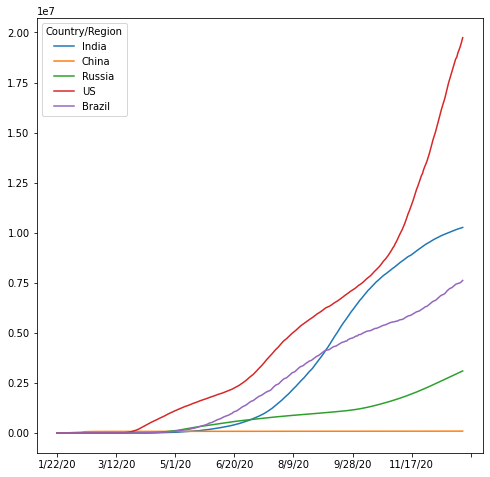

In [24]:
data_transposed = data.T
data_transposed.plot(y=["India","China","Russia","US","Brazil"], use_index = True, figsize = (8,8));
plt.savefig('/home/jovyan/Analysis/COVID19-Exploration/figure.png', dpi=500, bbox_inches="tight", pad_inches=0.05)

### We can see that India is the most affected developing country wrt COVID-19

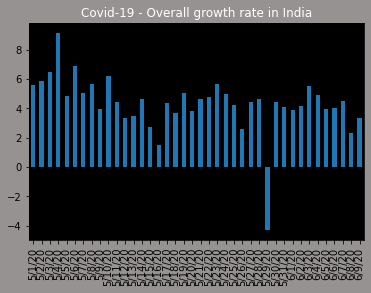

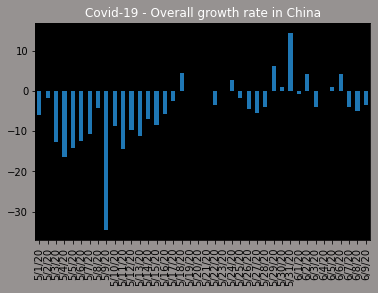

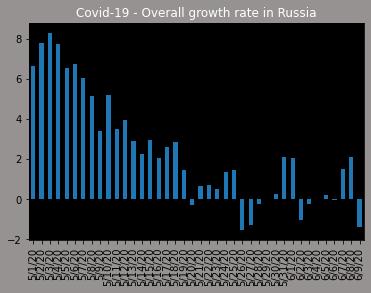

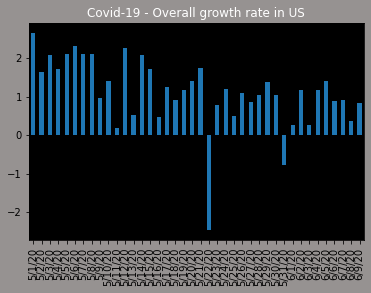

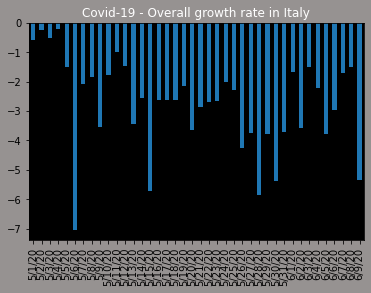

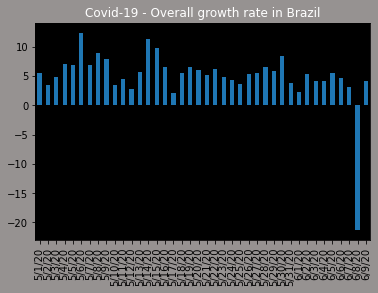

In [26]:
for country in countries:
    ax = plt.subplot()
    ax.set_facecolor('black')
    ax.figure.set_facecolor('#969291')
    ax.tick_params(axis='x',color='black')
    ax.tick_params(axis='y',color='black')
    ax.set_title(f'Covid-19 - Overall growth rate in {country}', color='white')
    overall_growth_rate[country][100:140:].plot.bar()
    plt.show()

#### Hence, I decided to make the rest of the analysis on India

### Geospatial Analysis using the world map shapefile

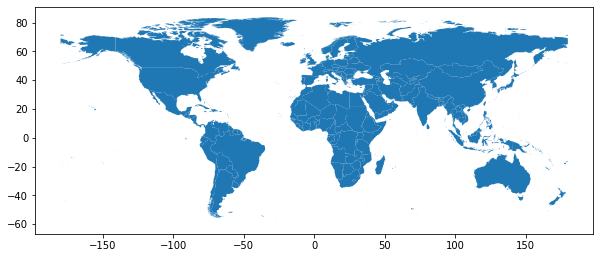

In [16]:
world = gpd.read_file(r"/home/jovyan/Analysis/COVID19-Exploration/GIS World Data File/World_Map.shp")
world.plot(figsize=(10,10));

In [17]:
#correcting misspellings with countries or just adjusting in general 
world.replace('Viet Nam', 'Vietnam', inplace = True)
world.replace('Brunei Darussalam', 'Brunei', inplace = True)
world.replace('Cape Verde', 'Cabo Verde', inplace = True)
world.replace('Democratic Republic of the Congo','Congo (Kinshasa)', inplace = True)
world.replace('Congo', 'Congo (Brazzaville)', inplace = True)
world.replace('Czech Republic', 'Czechia', inplace = True)
world.replace('Switzerland', 'Eswatini', inplace = True)
world.replace('Iran (Islamic Republic of)', 'Iran', inplace = True)
world.replace('Korea, Republic of', 'Korea, South', inplace = True)
world.replace('Lao People\'s Democratic Republic', 'Laos', inplace = True)
world.replace('Libyan Arab Jamahiriya', 'Libya', inplace = True)
world.replace('Republic of Moldova', 'Moldova', inplace = True)
world.replace('The former Yugoslav Republic of Macedonia', 'North Macedonia', inplace = True)
world.replace('Syrian Arab Republic', 'Syria', inplace = True)
world.replace('Taiwan', 'Taiwan*', inplace = True)
world.replace('United Republic of Tanzania', 'Tanzania', inplace = True)
world.replace('United States', 'US', inplace = True)
world.replace('Palestinian', 'West Bank of Gaza', inplace = True)

In [18]:
for index,row in data.iterrows():
    if index not in world['NAME'].to_list():
        print(index + ": is not in list")
    else:
        pass

Diamond Princess: is not in list
Holy See: is not in list
Kosovo: is not in list
MS Zaandam: is not in list
South Sudan: is not in list
Switzerland: is not in list
West Bank and Gaza: is not in list


In [19]:
merge = world.join(data, on = 'NAME', how = 'right')

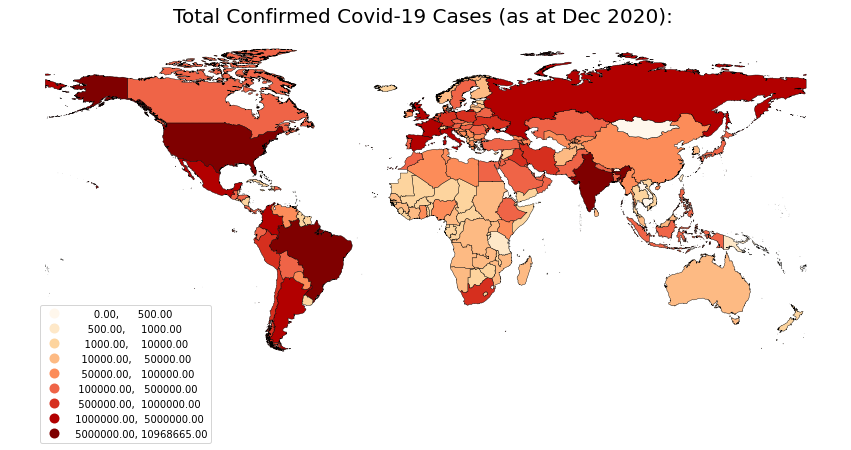

In [21]:
ax = merge.plot(column = '11/14/20',
                cmap = 'OrRd',
                figsize = (15,15),
                legend = True,
                scheme = 'user_defined',
                classification_kwds = {'bins': [500, 1000, 10000, 50000, 100000, 500000, 1000000, 5000000]},
                edgecolor = 'black',
                linewidth = 0.4)

ax.set_title('Total Confirmed Covid-19 Cases (as at Dec 2020): ',fontdict = {'fontsize':20}, pad = 12.5)
ax.set_axis_off()
ax.get_legend().set_bbox_to_anchor((0.25,0.2))